In [12]:
pip install geopandas matplotlib pandas shapely

   --- ------------------------------------ 1.2/16.2 MB 71.4 kB/s eta 0:03:30
   --- ------------------------------------ 1.2/16.2 MB 71.4 kB/s eta 0:03:30
   --- ------------------------------------ 1.3/16.2 MB 70.1 kB/s eta 0:03:33
   --- ------------------------------------ 1.3/16.2 MB 70.1 kB/s eta 0:03:33
   --- ------------------------------------ 1.3/16.2 MB 70.1 kB/s eta 0:03:33
   --- ------------------------------------ 1.3/16.2 MB 70.1 kB/s eta 0:03:33
   --- ------------------------------------ 1.3/16.2 MB 70.1 kB/s eta 0:03:33
   --- ------------------------------------ 1.3/16.2 MB 70.1 kB/s eta 0:03:33
   --- ------------------------------------ 1.3/16.2 MB 70.1 kB/s eta 0:03:33
   --- ------------------------------------ 1.3/16.2 MB 70.1 kB/s eta 0:03:33
   --- ------------------------------------ 1.3/16.2 MB 69.8 kB/s eta 0:03:34
   --- ------------------------------------ 1.3/16.2 MB 69.8 kB/s eta 0:03:34
   --- ------------------------------------ 1.3/16.2 MB 69.8 kB/

In [13]:
pip install geodatasets

C:\Users\EliteBook\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


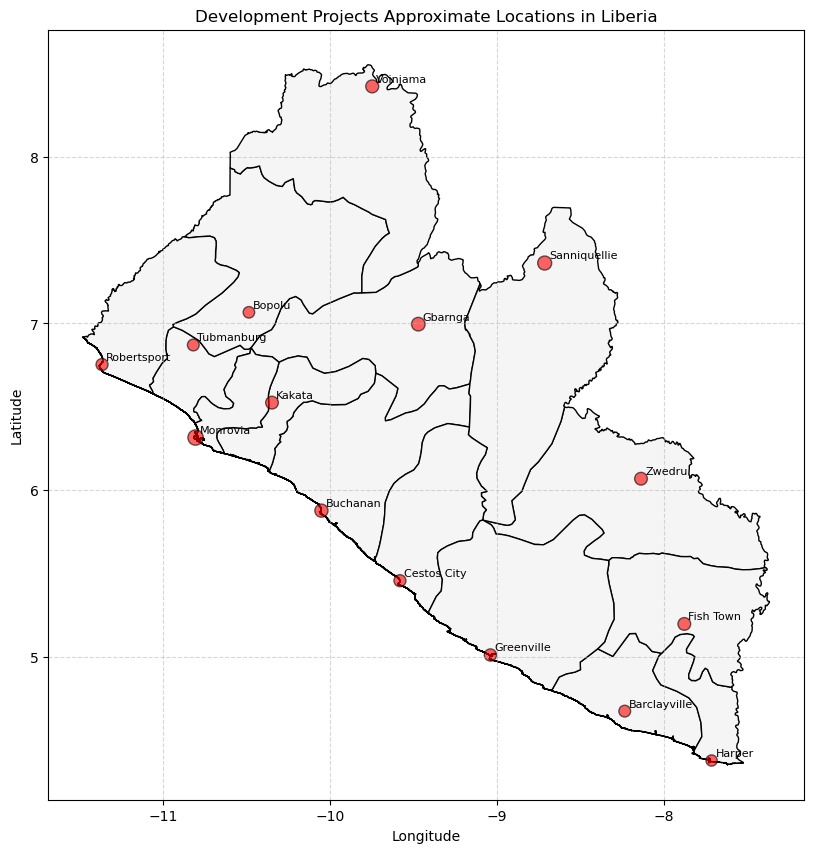

In [14]:

import geopandas as gpd

import pandas as pd

import matplotlib.pyplot as plt

import geodatasets
 

# Load dataset

projects_df = pd.read_csv("projects_1.csv")

 

# Convert to GeoDataFrame

gdf = gpd.GeoDataFrame(

    projects_df, geometry=gpd.points_from_xy(projects_df.Longitude, projects_df.Latitude))

 

# Load a basic map of Liberia



# Load the world map dataset from geodatasets
world = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1")




liberia = world[world["COUNTRY"] == "Liberia"]

 

# Plot

fig, ax = plt.subplots(figsize=(10, 10))

liberia.plot(ax=ax, color='whitesmoke', edgecolor='black')

 

# Plot project points

gdf.plot(ax=ax, markersize=gdf['Projects_Count']*3, color='red', alpha=0.6, edgecolor='black')

 

# Annotate the points with town names

for idx, row in gdf.iterrows():

    ax.annotate(row['Town'], xy=(row['Longitude'], row['Latitude']),

                xytext=(3, 3), textcoords='offset points', fontsize=8)

 

plt.title('Development Projects Approximate Locations in Liberia')

plt.xlabel('Longitude')

plt.ylabel('Latitude')

plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


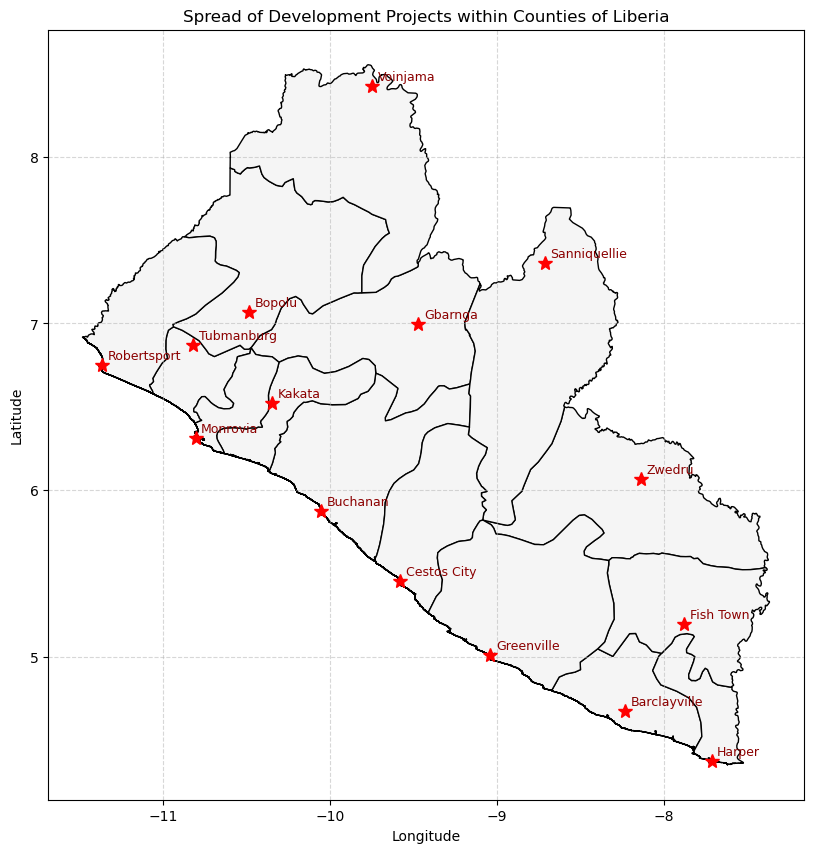

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geodatasets

county_towns = {
    "Bong": ("Gbarnga", 6.9956, -9.4712),
    "Nimba": ("Sanniquellie", 7.3622, -8.7133),
    "Sinoe": ("Greenville", 5.0111, -9.0388),
    "Grand Bassa": ("Buchanan", 5.8770, -10.0525),
    "Grand Cape Mount": ("Robertsport", 6.7533, -11.3686),
    "Maryland": ("Harper", 4.3782, -7.7123),
    "Montserrado": ("Monrovia", 6.3156, -10.8074),
    "Bomi": ("Tubmanburg", 6.8706, -10.8211),
    "Grand Kru": ("Barclayville", 4.6744, -8.2331),
    "Margibi": ("Kakata", 6.5250, -10.3490),
    "River Cess": ("Cestos City", 5.4568, -9.5815),
    "Grand Gedeh": ("Zwedru", 6.0685, -8.1356),
    "Lofa": ("Voinjama", 8.4219, -9.7478),
    "Gbarpolu": ("Bopolu", 7.0667, -10.4875),
    "River Gee": ("Fish Town", 5.1974, -7.8758)
}

project_counts = {
    "Bong": 32, "Nimba": 34, "Sinoe": 26, "Grand Bassa": 30, "Grand Cape Mount": 25,
    "Maryland": 22, "Montserrado": 41, "Bomi": 24, "Grand Kru": 24, "Margibi": 28,
    "River Cess": 25, "Grand Gedeh": 28, "Lofa": 29, "Gbarpolu": 23, "River Gee": 28
}

project_locations = []

for county, num_projects in project_counts.items():
    town, lat_center, lon_center = county_towns[county]
    for _ in range(num_projects):
        lat_offset = np.random.uniform(-0.2, 0.2)
        lon_offset = np.random.uniform(-0.2, 0.2)
        project_locations.append({
            "County": county,
            "Latitude": lat_center + lat_offset,
            "Longitude": lon_center + lon_offset
        })

projects_df = pd.read_csv("Project counts_1.csv")

gdf = gpd.GeoDataFrame(
    projects_df, geometry=gpd.points_from_xy(projects_df.Longitude, projects_df.Latitude))

world = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1")
liberia = world[world["COUNTRY"] == "Liberia"]

fig, ax = plt.subplots(figsize=(10, 10))
liberia.plot(ax=ax, color='whitesmoke', edgecolor='black')

gdf.plot(ax=ax, markersize=15, color='blue', alpha=0.6, edgecolor='black')

for county, (town, lat, lon) in county_towns.items():
    ax.plot(lon, lat, marker='*', color='red', markersize=10)
    ax.annotate(town, xy=(lon, lat), xytext=(4, 4), textcoords='offset points', fontsize=9, color='darkred')

ax.set_title('Spread of Development Projects within Counties of Liberia')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()



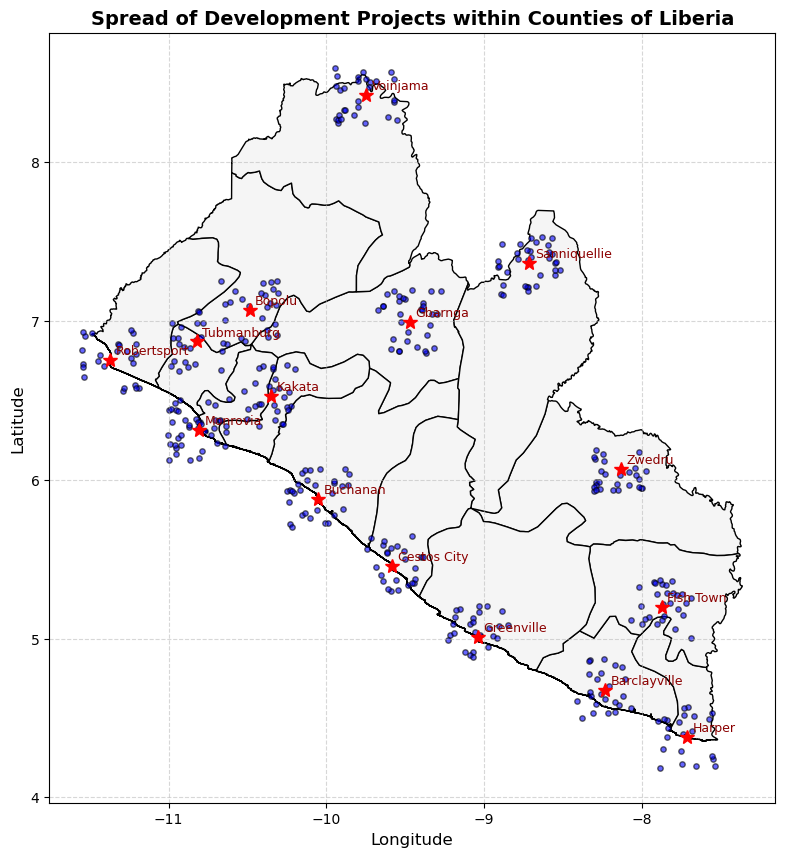

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define county towns with coordinates
county_towns = {
    "Bong": ("Gbarnga", 6.9956, -9.4712),
    "Nimba": ("Sanniquellie", 7.3622, -8.7133),
    "Sinoe": ("Greenville", 5.0111, -9.0388),
    "Grand Bassa": ("Buchanan", 5.8770, -10.0525),
    "Grand Cape Mount": ("Robertsport", 6.7533, -11.3686),
    "Maryland": ("Harper", 4.3782, -7.7123),
    "Montserrado": ("Monrovia", 6.3156, -10.8074),
    "Bomi": ("Tubmanburg", 6.8706, -10.8211),
    "Grand Kru": ("Barclayville", 4.6744, -8.2331),
    "Margibi": ("Kakata", 6.5250, -10.3490),
    "River Cess": ("Cestos City", 5.4568, -9.5815),
    "Grand Gedeh": ("Zwedru", 6.0685, -8.1356),
    "Lofa": ("Voinjama", 8.4219, -9.7478),
    "Gbarpolu": ("Bopolu", 7.0667, -10.4875),
    "River Gee": ("Fish Town", 5.1974, -7.8758)
}

# Define number of projects per county
project_counts = {
    "Bong": 32, "Nimba": 34, "Sinoe": 26, "Grand Bassa": 30, "Grand Cape Mount": 25,
    "Maryland": 22, "Montserrado": 41, "Bomi": 24, "Grand Kru": 24, "Margibi": 28,
    "River Cess": 25, "Grand Gedeh": 28, "Lofa": 29, "Gbarpolu": 23, "River Gee": 28
}

# Generate random project locations around county towns
project_locations = []

for county, num_projects in project_counts.items():
    town, lat_center, lon_center = county_towns[county]
    for _ in range(num_projects):
        lat_offset = np.random.uniform(-0.2, 0.2)
        lon_offset = np.random.uniform(-0.2, 0.2)
        project_locations.append({
            "County": county,
            "Latitude": lat_center + lat_offset,
            "Longitude": lon_center + lon_offset
        })

# Create DataFrame and convert to GeoDataFrame
projects_df = pd.DataFrame(project_locations)
gdf = gpd.GeoDataFrame(
    projects_df, geometry=gpd.points_from_xy(projects_df.Longitude, projects_df.Latitude), crs="EPSG:4326"
)

# Load Liberia shapefile (modify path as needed)
world = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1")
liberia = world[world["COUNTRY"] == "Liberia"]

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
liberia.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot projects
gdf.plot(ax=ax, markersize=15, color='blue', alpha=0.6, edgecolor='black')

# Plot county towns and annotate
for county, (town, lat, lon) in county_towns.items():
    ax.plot(lon, lat, marker='*', color='red', markersize=10)
    ax.annotate(town, xy=(lon, lat), xytext=(4, 4),
                textcoords='offset points', fontsize=9, color='darkred')

# Set plot aesthetics
ax.set_title('Spread of Development Projects within Counties of Liberia', fontsize=14, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


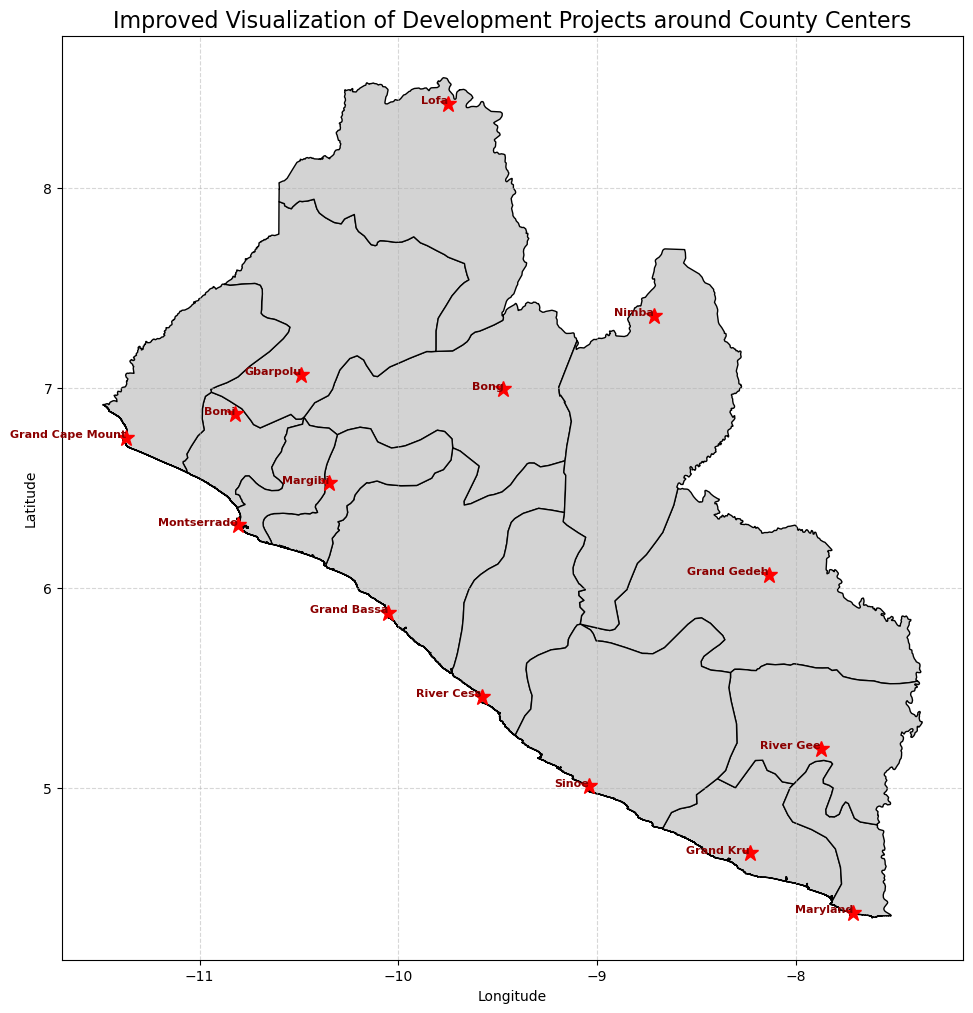

In [17]:
# Complete script to visualize Liberia project data

# Step 1: Install Libraries
# Run this once in your terminal or Jupyter Notebook cell
# !pip install geopandas matplotlib pandas numpy shapely

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 2: Ensure the CSV file (Project counts_1.csv) exists in the same directory with this structure:
# | County | Projects_Count |
# |--------|----------------|
# | Bong | 32 |
# | Nimba | 34 | (and so forth)

# Load your CSV data
projects_df = pd.read_csv("Project counts_1.csv")

# Define county centroids (approximate geographic centers)
county_centroids = {
    "Bong": (6.9956, -9.4712),
    "Nimba": (7.3622, -8.7133),
    "Sinoe": (5.0111, -9.0388),
    "Grand Bassa": (5.8770, -10.0525),
    "Grand Cape Mount": (6.7533, -11.3686),
    "Maryland": (4.3782, -7.7123),
    "Montserrado": (6.3156, -10.8074),
    "Bomi": (6.8706, -10.8211),
    "Grand Kru": (4.6744, -8.2331),
    "Margibi": (6.5250, -10.3490),
    "River Cess": (5.4568, -9.5815),
    "Grand Gedeh": (6.0685, -8.1356),
    "Lofa": (8.4219, -9.7478),
    "Gbarpolu": (7.0667, -10.4875),
    "River Gee": (5.1974, -7.8758)
}

# Step 3: Generate random locations around county centers
project_locations = []
np.random.seed(42)

for _, row in projects_df.iterrows():
    county = row["County"]
    count = row["Projects_Count"]
    lat_center, lon_center = county_centroids[county]

    for _ in range(count):
        lat_offset = np.random.uniform(-0.2, 0.2)
        lon_offset = np.random.uniform(-0.2, 0.2)
        project_locations.append({
            "County": county,
            "Latitude": lat_center + lat_offset,
            "Longitude": lon_center + lon_offset
        })

# Step 4: Create GeoDataFrame
projects_final_df = pd.DataFrame(project_locations)
gdf = gpd.GeoDataFrame(
    projects_df, geometry=gpd.points_from_xy(projects_df.Longitude, projects_df.Latitude), crs="EPSG:4326")

# Step 4: Load Liberia boundary shapefile (ensure correct path)
liberia_map = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1")

# Step 5: Plot
fig, ax = plt.subplots(figsize=(12, 12))

# Ensure CRS match
gdf.set_crs("EPSG:4326", inplace=True)
liberia = liberia.to_crs("EPSG:4326")

liberia.plot(ax=ax, color='lightgray', edgecolor='black')
gdf.plot(ax=ax, markersize=20, color='blue', alpha=0.6, edgecolor='black')

# Clearly show county centers
for county, (lat, lon) in county_centroids.items():
    ax.plot(lon, lat, marker='*', color='red', markersize=12)
    ax.text(lon, lat, county, fontsize=8, fontweight='bold', color='darkred', ha='right')

ax.set_title("Improved Visualization of Development Projects around County Centers", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(alpha=0.5, linestyle='--')

plt.show()



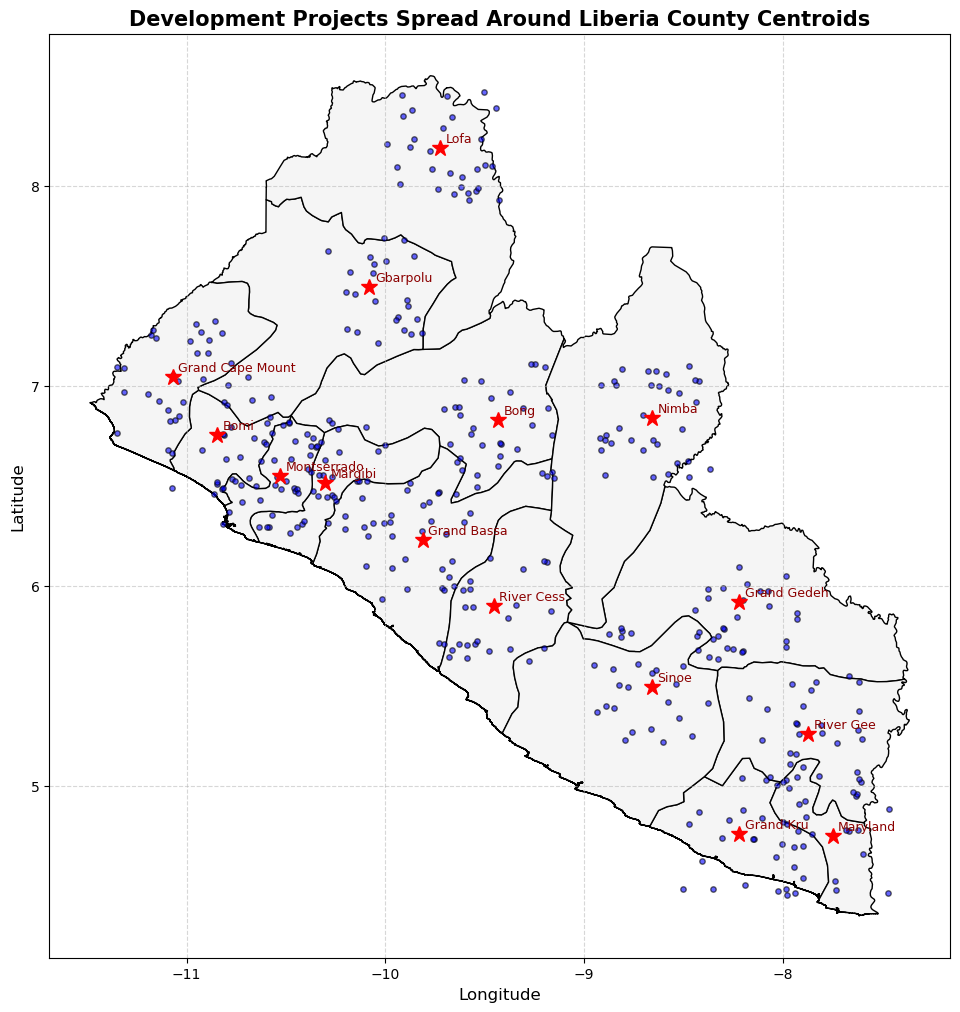

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Liberia County Centroid Coordinates (approximate geographic centers)
county_centroids = {
    "Bong": (6.8298, -9.4333),
    "Nimba": (6.8420, -8.6601),
    "Sinoe": (5.4987, -8.6601),
    "Grand Bassa": (6.2308, -9.8125),
    "Grand Cape Mount": (7.0468, -11.0712),
    "Maryland": (4.7500, -7.7500),
    "Montserrado": (6.5526, -10.5296),
    "Bomi": (6.7563, -10.8451),
    "Grand Kru": (4.7614, -8.2213),
    "Margibi": (6.5159, -10.3042),
    "River Cess": (5.9025, -9.4562),
    "Grand Gedeh": (5.9222, -8.2213),
    "Lofa": (8.1911, -9.7233),
    "Gbarpolu": (7.4950, -10.0807),
    "River Gee": (5.2605, -7.8722)
}

# Number of projects per county
project_counts = {
    "Bong": 32, "Nimba": 34, "Sinoe": 26, "Grand Bassa": 30, "Grand Cape Mount": 25,
    "Maryland": 22, "Montserrado": 41, "Bomi": 24, "Grand Kru": 24, "Margibi": 28,
    "River Cess": 25, "Grand Gedeh": 28, "Lofa": 29, "Gbarpolu": 23, "River Gee": 28
}

# Generate random project locations around county centroids
np.random.seed(42)  # Ensures reproducibility
project_locations = []

for county, num_projects in project_counts.items():
    lat_center, lon_center = county_centroids[county]
    for _ in range(num_projects):
        # Slightly spread out for better visibility
        lat_offset = np.random.uniform(-0.3, 0.3)
        lon_offset = np.random.uniform(-0.3, 0.3)
        project_locations.append({
            "County": county,
            "Latitude": lat_center + lat_offset,
            "Longitude": lon_center + lon_offset
        })

# Create DataFrame and convert to GeoDataFrame
projects_df = pd.DataFrame(project_locations)
gdf = gpd.GeoDataFrame(
    projects_df,
    geometry=gpd.points_from_xy(projects_df.Longitude, projects_df.Latitude),
    crs="EPSG:4326"
)

# Load Liberia shapefile (Update the path below correctly!)
liberia = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1").to_crs("EPSG:4326")

# Plot the map
fig, ax = plt.subplots(figsize=(12, 12))
liberia.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot projects
gdf.plot(ax=ax, markersize=15, color='blue', alpha=0.6, edgecolor='black')

# Mark county centroids
for county, (lat, lon) in county_centroids.items():
    ax.plot(lon, lat, marker='*', color='red', markersize=12)
    ax.annotate(county, xy=(lon, lat), xytext=(4, 4),
                textcoords='offset points', fontsize=9, color='darkred')

# Aesthetic improvements
ax.set_title('Development Projects Spread Around Liberia County Centroids', fontsize=15, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


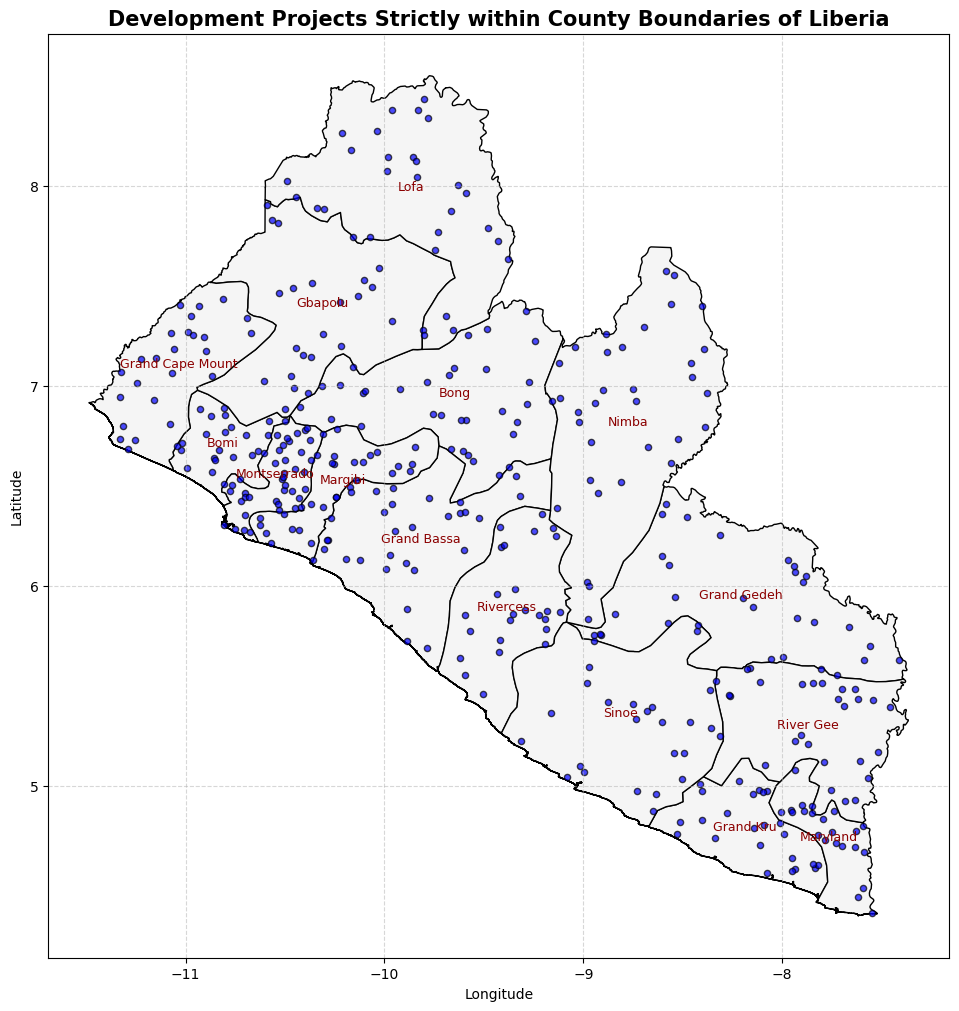

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import numpy as np

# Step 1: Load Liberia county boundaries
liberia = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1").to_crs("EPSG:4326")

# Step 2: Project counts per county
project_counts = {
    "Bong": 32, "Nimba": 34, "Sinoe": 26, "Grand Bassa": 30, "Grand Cape Mount": 25,
    "Maryland": 22, "Montserrado": 41, "Bomi": 24, "Grand Kru": 24, "Margibi": 28,
    "Rivercess": 25, "Grand Gedeh": 28, "Lofa": 29, "Gbapolu": 23, "River Gee": 28
}

# Step 3: Generate points strictly within each county polygon
def generate_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x),
                             np.random.uniform(min_y, max_y))
        if poly.contains(random_point):
            points.append(random_point)
    return points

# Step 4: Generate project points for each county
project_points = []
for county_name, num_projects in project_counts.items():
    county_polygon = liberia[liberia['NAME_1'] == county_name].geometry.values[0]
    points_in_county = generate_points_within(county_polygon, num_projects)
    for point in points_in_county:
        project_points.append({"County": county_name, "geometry": point})

# Convert to GeoDataFrame
projects_gdf = gpd.GeoDataFrame(project_points, crs="EPSG:4326")

# Step 5: Visualization
fig, ax = plt.subplots(figsize=(12, 12))
liberia.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot generated project points
projects_gdf.plot(ax=ax, markersize=20, color='blue', alpha=0.7, edgecolor='k')

# Annotate county names at centroid
for idx, row in liberia.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(row['NAME_1'], (centroid.x, centroid.y),
                fontsize=9, color='darkred', ha='center')

# Final plot adjustments
ax.set_title('Development Projects Strictly within County Boundaries of Liberia',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [20]:
print(liberia['NAME_1'].unique())


['Bomi' 'Bong' 'Gbapolu' 'Grand Bassa' 'Grand Cape Mount' 'Grand Gedeh'
 'Grand Kru' 'Lofa' 'Margibi' 'Maryland' 'Montserrado' 'Nimba' 'River Gee'
 'Rivercess' 'Sinoe']


In [21]:
print(sorted(liberia['NAME_1'].unique()))
print(sorted(project_counts.keys()))


['Bomi', 'Bong', 'Gbapolu', 'Grand Bassa', 'Grand Cape Mount', 'Grand Gedeh', 'Grand Kru', 'Lofa', 'Margibi', 'Maryland', 'Montserrado', 'Nimba', 'River Gee', 'Rivercess', 'Sinoe']
['Bomi', 'Bong', 'Gbapolu', 'Grand Bassa', 'Grand Cape Mount', 'Grand Gedeh', 'Grand Kru', 'Lofa', 'Margibi', 'Maryland', 'Montserrado', 'Nimba', 'River Gee', 'Rivercess', 'Sinoe']


⚠️ County 'river cess' not found in shapefile!
⚠️ County 'gbarpolu' not found in shapefile!


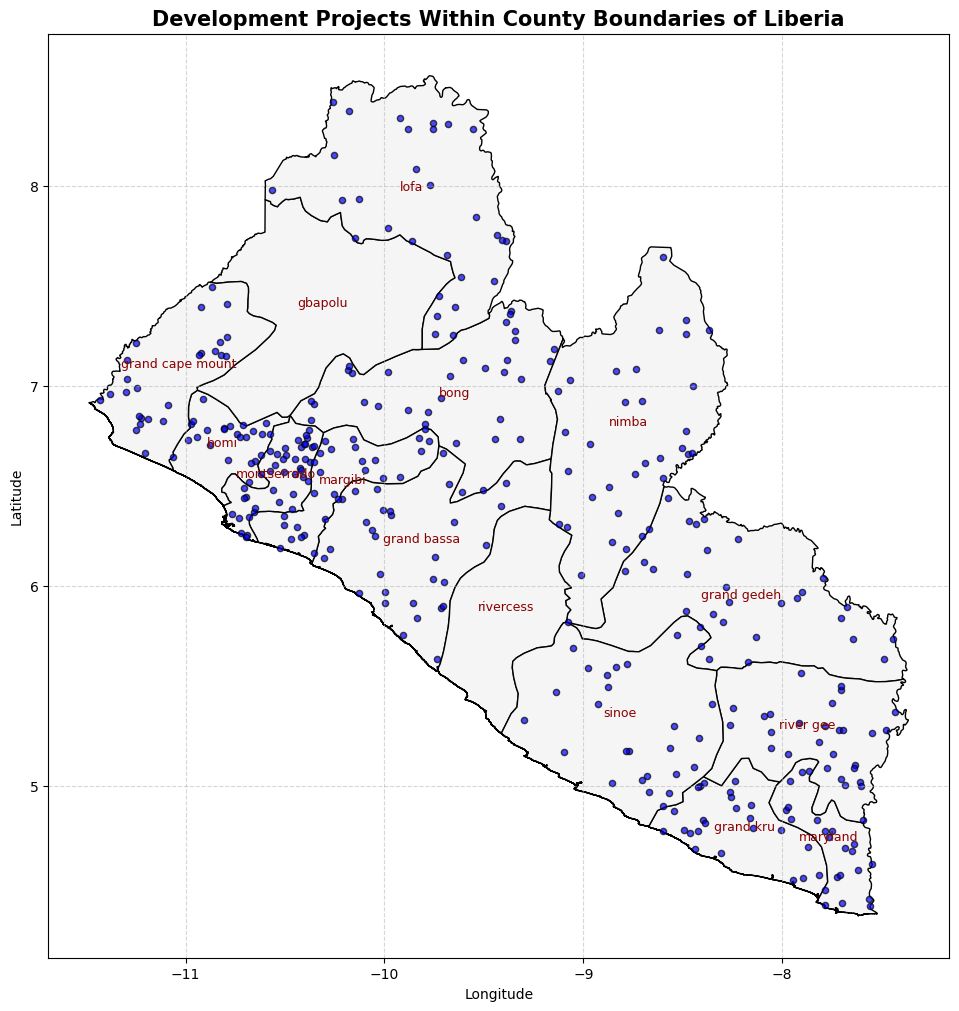

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import numpy as np

# Load Liberia county boundaries (update path if needed)
liberia = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1").to_crs("EPSG:4326")

# Ensure consistent formatting
liberia['NAME_1'] = liberia['NAME_1'].str.strip().str.lower()

# Project counts per county (ensure names match exactly!)
project_counts = {
    "bong": 32, "nimba": 34, "sinoe": 26, "grand bassa": 30, "grand cape mount": 25,
    "maryland": 22, "montserrado": 41, "bomi": 24, "grand kru": 24, "margibi": 28,
    "river cess": 25, "grand gedeh": 28, "lofa": 29, "gbarpolu": 23, "river gee": 28
}

# Generate points within county boundaries
def generate_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if poly.contains(random_point):
            points.append(random_point)
    return points

# Generate project points for each county
project_points = []
for county_name, num_projects in project_counts.items():
    county_name_fixed = county_name.lower().strip()
    matching_rows = liberia[liberia['NAME_1'] == county_name_fixed]

    if len(matching_rows) == 0:
        print(f"⚠️ County '{county_name}' not found in shapefile!")  # Debugging
        continue  # Skip missing counties

    county_polygon = matching_rows.geometry.values[0]
    points_in_county = generate_points_within(county_polygon, num_projects)
    
    for point in points_in_county:
        project_points.append({"County": county_name_fixed, "geometry": point})

# Convert to GeoDataFrame
projects_gdf = gpd.GeoDataFrame(project_points, crs="EPSG:4326")

# Plot the map
fig, ax = plt.subplots(figsize=(12, 12))
liberia.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot generated project points
projects_gdf.plot(ax=ax, markersize=20, color='blue', alpha=0.7, edgecolor='k')

# Annotate county names at centroid
for idx, row in liberia.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(row['NAME_1'], (centroid.x, centroid.y),
                fontsize=9, color='darkred', ha='center')

# Final plot adjustments
ax.set_title('Development Projects Within County Boundaries of Liberia',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import numpy as np

# Step 1: Load Liberia county boundaries
liberia = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1").to_crs("EPSG:4326")

# Step 2: Create project dataset (including organizations)
project_data = [
    {"County": "Bong", "Projects": 32, "Organization": "World Bank"},
    {"County": "Nimba", "Projects": 34, "Organization": "African Development Bank"},
    {"County": "Sinoe", "Projects": 26, "Organization": "USAID"},
    {"County": "Grand Bassa", "Projects": 30, "Organization": "World Bank"},
    {"County": "Grand Cape Mount", "Projects": 25, "Organization": "European Union"},
    {"County": "Maryland", "Projects": 22, "Organization": "UNDP"},
    {"County": "Montserrado", "Projects": 41, "Organization": "USAID"},
    {"County": "Bomi", "Projects": 24, "Organization": "African Development Bank"},
    {"County": "Grand Kru", "Projects": 24, "Organization": "UNDP"},
    {"County": "Margibi", "Projects": 28, "Organization": "World Bank"},
    {"County": "Rivercess", "Projects": 25, "Organization": "USAID"},
    {"County": "Grand Gedeh", "Projects": 28, "Organization": "African Development Bank"},
    {"County": "Lofa", "Projects": 29, "Organization": "European Union"},
    {"County": "Gbarpolu", "Projects": 23, "Organization": "USAID"},
    {"County": "River Gee", "Projects": 28, "Organization": "World Bank"}
]

# Convert to DataFrame
projects_df = pd.DataFrame(project_data)

# Step 3: Generate points strictly within each county polygon
def generate_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x),
                             np.random.uniform(min_y, max_y))
        if poly.contains(random_point):
            points.append(random_point)
    return points

# Step 4: Generate project points for each county
project_points = []
for _, row in projects_df.iterrows():
    county_name = row["County"]
    num_projects = row["Projects"]
    organization = row["Organization"]
    
    county_polygon = liberia[liberia['NAME_1'] == county_name].geometry.values[0]
    points_in_county = generate_points_within(county_polygon, num_projects)
    
    for point in points_in_county:
        project_points.append({"County": county_name, "Organization": organization, "geometry": point})

# Convert to GeoDataFrame
projects_gdf = gpd.GeoDataFrame(project_points, crs="EPSG:4326")

# Step 5: Assign colors for each organization
org_colors = {
    "World Bank": "blue",
    "African Development Bank": "green",
    "USAID": "red",
    "European Union": "purple",
    "UNDP": "orange"
}

# Map colors to projects
projects_gdf["Color"] = projects_gdf["Organization"].map(org_colors)

# Step 6: Visualization
fig, ax = plt.subplots(figsize=(12, 12))
liberia.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot generated project points
for org, color in org_colors.items():
    subset = projects_gdf[projects_gdf["Organization"] == org]
    subset.plot(ax=ax, markersize=20, color=color, alpha=0.7, edgecolor='k', label=org)

# Annotate county names at centroid
for idx, row in liberia.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(row['NAME_1'], (centroid.x, centroid.y),
                fontsize=9, color='darkred', ha='center')

# Add legend
plt.legend(title="Development Organizations", fontsize=10, loc="lower right")

# Final plot adjustments
ax.set_title('Development Projects by Organization Within County Boundaries of Liberia',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import numpy as np

# Load Liberia county boundaries (update path if needed)
liberia = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1").to_crs("EPSG:4326")

# Normalize county names (fixes mismatches)
liberia['NAME_1'] = liberia['NAME_1'].str.strip().str.lower()

# Create project dataset (ensure exact county name matches)
project_data = [
    {"County": "bong", "Projects": 32, "Organization": "World Bank"},
    {"County": "nimba", "Projects": 34, "Organization": "African Development Bank"},
    {"County": "sinoe", "Projects": 26, "Organization": "USAID"},
    {"County": "grand bassa", "Projects": 30, "Organization": "World Bank"},
    {"County": "grand cape mount", "Projects": 25, "Organization": "European Union"},
    {"County": "maryland", "Projects": 22, "Organization": "UNDP"},
    {"County": "montserrado", "Projects": 41, "Organization": "USAID"},
    {"County": "bomi", "Projects": 24, "Organization": "African Development Bank"},
    {"County": "grand kru", "Projects": 24, "Organization": "UNDP"},
    {"County": "margibi", "Projects": 28, "Organization": "World Bank"},
    {"County": "rivercess", "Projects": 25, "Organization": "USAID"},
    {"County": "grand gedeh", "Projects": 28, "Organization": "African Development Bank"},
    {"County": "lofa", "Projects": 29, "Organization": "European Union"},
    {"County": "gbapolu", "Projects": 23, "Organization": "USAID"},
    {"County": "river gee", "Projects": 28, "Organization": "World Bank"}
]

# Convert to DataFrame
projects_df = pd.DataFrame(project_data)
projects_df["County"] = projects_df["County"].str.strip().str.lower()  # Ensure case consistency

# Generate points strictly within each county polygon
def generate_points_within(poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x),
                             np.random.uniform(min_y, max_y))
        if poly.contains(random_point):
            points.append(random_point)
    return points

# Generate project points for each county
project_points = []
for _, row in projects_df.iterrows():
    county_name = row["County"]
    num_projects = row["Projects"]
    organization = row["Organization"]
    
    # Fix: Check if county exists
    matching_rows = liberia[liberia['NAME_1'] == county_name]
    if len(matching_rows) == 0:
        print(f"⚠️ County '{county_name}' not found in shapefile!")  # Debugging message
        continue  # Skip this county if not found

    county_polygon = matching_rows.geometry.values[0]
    points_in_county = generate_points_within(county_polygon, num_projects)
    
    for point in points_in_county:
        project_points.append({"County": county_name, "Organization": organization, "geometry": point})

# Convert to GeoDataFrame
projects_gdf = gpd.GeoDataFrame(project_points, crs="EPSG:4326")

# Assign colors for each organization
org_colors = {
    "World Bank": "blue",
    "African Development Bank": "green",
    "USAID": "red",
    "European Union": "purple",
    "UNDP": "orange"
}

# Map colors to projects
projects_gdf["Color"] = projects_gdf["Organization"].map(org_colors)

# Visualization
fig, ax = plt.subplots(figsize=(12, 12))
liberia.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot projects with different colors based on funding organization
for org, color in org_colors.items():
    subset = projects_gdf[projects_gdf["Organization"] == org]
    subset.plot(ax=ax, markersize=20, color=color, alpha=0.7, edgecolor='k', label=org)

# Annotate county names at centroid
for idx, row in liberia.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(row['NAME_1'], (centroid.x, centroid.y),
                fontsize=9, color='darkred', ha='center')

# Add legend
plt.legend(title="Development Organizations", fontsize=10, loc="lower right")

# Final plot adjustments
ax.set_title('Development Projects by Organization Within County Boundaries of Liberia',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import numpy as np

# Step 1: Load Liberia county boundaries
liberia = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1").to_crs("EPSG:4326")

# Normalize county names to prevent mismatches
liberia['NAME_1'] = liberia['NAME_1'].str.strip().str.lower()

# Step 2: Create a more flexible project dataset (multiple organizations per county)
project_data = [
    {"County": "bong", "Projects": 32, "Organization": "World Bank"},
    {"County": "bong", "Projects": 10, "Organization": "USAID"},
    {"County": "nimba", "Projects": 34, "Organization": "African Development Bank"},
    {"County": "nimba", "Projects": 15, "Organization": "European Union"},
    {"County": "sinoe", "Projects": 26, "Organization": "USAID"},
    {"County": "grand bassa", "Projects": 30, "Organization": "World Bank"},
    {"County": "grand bassa", "Projects": 20, "Organization": "African Development Bank"},
    {"County": "grand cape mount", "Projects": 25, "Organization": "European Union"},
    {"County": "maryland", "Projects": 22, "Organization": "UNDP"},
    {"County": "montserrado", "Projects": 41, "Organization": "USAID"},
    {"County": "bomi", "Projects": 24, "Organization": "African Development Bank"},
    {"County": "grand kru", "Projects": 24, "Organization": "UNDP"},
    {"County": "margibi", "Projects": 28, "Organization": "World Bank"},
    {"County": "rivercess", "Projects": 25, "Organization": "USAID"},
    {"County": "grand gedeh", "Projects": 28, "Organization": "African Development Bank"},
    {"County": "lofa", "Projects": 29, "Organization": "European Union"},
    {"County": "gbapolu", "Projects": 23, "Organization": "USAID"},
    {"County": "river gee", "Projects": 28, "Organization": "World Bank"},
    {"County": "river gee", "Projects": 15, "Organization": "European Union"}
]

# Convert to DataFrame
projects_df = pd.DataFrame(project_data)
projects_df["County"] = projects_df["County"].str.strip().str.lower()  # Ensure case consistency

# Step 3: Generate points strictly within each county polygon
def generate_points_within(poly, num_points):
    """Generates points randomly within a given polygon (county)."""
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if poly.contains(random_point):
            points.append(random_point)
    return points

# Step 4: Generate project points for each county
project_points = []
for _, row in projects_df.iterrows():
    county_name = row["County"]
    num_projects = row["Projects"]
    organization = row["Organization"]
    
    # Fix: Check if county exists
    matching_rows = liberia[liberia['NAME_1'] == county_name]
    if len(matching_rows) == 0:
        print(f"⚠️ County '{county_name}' not found in shapefile!")  # Debugging message
        continue  # Skip this county if not found

    county_polygon = matching_rows.geometry.values[0]
    points_in_county = generate_points_within(county_polygon, num_projects)
    
    for point in points_in_county:
        project_points.append({"County": county_name, "Organization": organization, "geometry": point})

# Convert to GeoDataFrame
projects_gdf = gpd.GeoDataFrame(project_points, crs="EPSG:4326")

# Step 5: Assign colors for each organization
org_colors = {
    "World Bank": "blue",
    "African Development Bank": "green",
    "USAID": "red",
    "European Union": "purple",
    "UNDP": "orange"
}

# Map colors to projects
projects_gdf["Color"] = projects_gdf["Organization"].map(org_colors)

# Step 6: Visualization
fig, ax = plt.subplots(figsize=(12, 12))
liberia.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot projects with different colors based on funding organization
for org, color in org_colors.items():
    subset = projects_gdf[projects_gdf["Organization"] == org]
    subset.plot(ax=ax, markersize=20, color=color, alpha=0.7, edgecolor='k', label=org)

# Annotate county names at centroid
for idx, row in liberia.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(row['NAME_1'], (centroid.x, centroid.y),
                fontsize=9, color='darkred', ha='center')

# Add legend
plt.legend(title="Development Organizations", fontsize=10, loc="lower right")

# Final plot adjustments
ax.set_title('Development Projects by Organization Within County Boundaries of Liberia',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import numpy as np

# Step 1: Load Liberia county boundaries
liberia = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1").to_crs("EPSG:4326")

# Normalize county names to prevent mismatches
liberia['NAME_1'] = liberia['NAME_1'].str.strip().str.lower()

# Step 2: Create a more flexible project dataset (multiple organizations per county)
project_data = pd.read_csv("Project_Count_by_Funding_Organization_and_County.csv")

# Convert to DataFrame
projects_df = pd.DataFrame(project_data)
projects_df["County"] = projects_df["County"].str.strip().str.lower()  # Ensure case consistency

# Step 3: Generate points strictly within each county polygon
def generate_points_within(poly, num_points):
    """Generates points randomly within a given polygon (county)."""
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if poly.contains(random_point):
            points.append(random_point)
    return points

# Step 4: Generate project points for each county
project_points = []
for _, row in projects_df.iterrows():
    county_name = row["County"]
    num_projects = row["Project Count"]
    organization = row["Funded by"]
    
    # Fix: Check if county exists
    matching_rows = liberia[liberia['NAME_1'] == county_name]
    if len(matching_rows) == 0:
        print(f"⚠️ County '{county_name}' not found in shapefile!")  # Debugging message
        continue  # Skip this county if not found

    county_polygon = matching_rows.geometry.values[0]
    points_in_county = generate_points_within(county_polygon, num_projects)
    
    for point in points_in_county:
        project_points.append({"County": county_name, "Funded by": organization, "geometry": point})

# Convert to GeoDataFrame
projects_gdf = gpd.GeoDataFrame(project_points, crs="EPSG:4326")

# Step 5: Assign colors for each organization
org_colors = {
    "International Development Association": "blue",
    "African Development Bank": "green",
    "USAID": "red",
    "European Union": "purple",
    "UNDP": "orange", "BADEA":"black","European Investment Bank":"yellow","Foreign Commonwealth Development Office":"cyan",
    "IFAD":"brown","Kuwait":"#FFD700","Norway":"#DC143C","Sweden":"#2F4F4F","OFID":"#DB7093","SAUDI FUND FOR DEVELOPMENT":"#2E8B57"
}

# Map colors to projects
projects_gdf["Color"] = projects_gdf["Funded by"].map(org_colors)

# Step 6: Visualization
fig, ax = plt.subplots(figsize=(12, 12))
liberia.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot projects with different colors based on funding organization
for org, color in org_colors.items():
    subset = projects_gdf[projects_gdf["Funded by"] == org]
    subset.plot(ax=ax, markersize=20, color=color, alpha=0.7, edgecolor='k', label=org)

# Annotate county names at centroid
for idx, row in liberia.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(row['NAME_1'], (centroid.x, centroid.y),
                fontsize=9, color='darkred', ha='center')

# Add legend
plt.legend(title="Development Organizations", fontsize=10, loc="lower right")

# Final plot adjustments
ax.set_title('Development Projects by Organization Within County Boundaries of Liberia',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [ ]:
if projects_gdf.empty:
    print("⚠️ Warning: No valid project points to plot. Skipping visualization.")
else:
    # Proceed with plotting
    fig, ax = plt.subplots(figsize=(12, 12))
    liberia.plot(ax=ax, color="whitesmoke", edgecolor="black")

    # Plot projects with different colors based on funding organization
    for org, color in org_colors.items():
        subset = projects_gdf[projects_gdf["Funded by"] == org]

        if not subset.empty:  # Only plot if data exists for this organization
            subset.plot(ax=ax, markersize=20, color=color, alpha=0.7, edgecolor="k", label=org)

    # Annotate county names at centroid
    for idx, row in liberia.iterrows():
        centroid = row["geometry"].centroid
        ax.annotate(row["NAME_1"], (centroid.x, centroid.y), fontsize=9, color="darkred", ha="center")

    # Add legend
    plt.legend(title="Development Organizations", fontsize=10, loc="lower left")

    # Final plot adjustments
    ax.set_title(
        "Development Projects by Organization Within County Boundaries of Liberia",
        fontsize=15,
        fontweight="bold",
    )
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.grid(True, linestyle="--", alpha=0.5)

    plt.show()


In [ ]:
print("Total projects:", len(projects_gdf))
print("Missing geometries:", projects_gdf["geometry"].isnull().sum())


In [ ]:
print("Project counties:", projects_df["County"].unique())
print("Shapefile counties:", liberia["NAME_1"].unique())


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import numpy as np

# Step 1: Load Liberia county boundaries
liberia = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1").to_crs("EPSG:4326")

# Normalize county names to prevent mismatches
liberia['NAME_1'] = liberia['NAME_1'].str.strip().str.lower()

# Step 2: Create a more flexible project dataset (multiple organizations per county)
project_data = pd.read_csv("Project_Count_by_Funding_Organization_and_County.csv")

# Convert to DataFrame
projects_df = pd.DataFrame(project_data)
projects_df["County"] = projects_df["County"].str.strip().str.lower()  # Ensure case consistency

# Step 3: Generate points strictly within each county polygon
def generate_points_within(poly, num_points):
    """Generates points randomly within a given polygon (county)."""
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if poly.contains(random_point):
            points.append(random_point)
    return points

# Step 4: Generate project points for each county
project_points = []
for _, row in projects_df.iterrows():
    county_name = row["County"]
    num_projects = row["Project Count"]
    organization = row["Funded by"]
    
    # Fix: Check if county exists
    matching_rows = liberia[liberia['NAME_1'] == county_name]
    if len(matching_rows) == 0:
        print(f"⚠️ County '{county_name}' not found in shapefile!")  # Debugging message
        continue  # Skip this county if not found

    county_polygon = matching_rows.geometry.values[0]
    points_in_county = generate_points_within(county_polygon, num_projects)
    
    for point in points_in_county:
        project_points.append({"County": county_name, "Funded by": organization, "geometry": point})

# Convert to GeoDataFrame
projects_gdf = gpd.GeoDataFrame(project_points, crs="EPSG:4326")

# Step 5: Assign marker shapes for each organization
org_markers = {
    "International Development Association": "o",  # Circle
    "African Development Bank": "s",  # Square
    "USAID": "^",  # Triangle
    "European Union": "D",  # Diamond
    "UNDP": "P",  # Pentagon
    "BADEA": "X",  # X shape
    "European Investment Bank": "h",  # Hexagon
    "Foreign Commonwealth Development Office": "*",  # Star
    "IFAD": "<",  # Left triangle
    "Kuwait": ">",  # Right triangle
    "Norway": "v",  # Downward triangle
    "Sweden": "d",  # Thin diamond instead of '|'
    "OFID": "H",  # Six-sided hexagon instead of '_'
    "SAUDI FUND FOR DEVELOPMENT": "p",  # Five-sided pentagon instead of '+'
}


# Step 6: Visualization
fig, ax = plt.subplots(figsize=(12, 12))
liberia.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot projects with different shapes based on funding organization
for org, marker in org_markers.items():
    subset = projects_gdf[projects_gdf["Funded by"] == org]
    
    if not subset.empty:  # Only plot if data exists for this organization
        subset.plot(ax=ax, markersize=50, marker=marker, alpha=0.7, edgecolor='k', label=org)

# Annotate county names at centroid
for idx, row in liberia.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(row['NAME_1'], (centroid.x, centroid.y),
                fontsize=9, color='darkred', ha='center')

# Add legend
plt.legend(title="Development Organizations", fontsize=10, loc="lower left")

# Final plot adjustments
ax.set_title('Development Projects by Organization Within County Boundaries of Liberia',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.5)

# 🔹 Save the plot as an image file
plt.savefig("liberia_development_projects.png", dpi=300, bbox_inches="tight")  # Save as PNG
# plt.savefig("liberia_development_projects.pdf", dpi=300, bbox_inches="tight")  # Save as PDF
# plt.savefig("liberia_development_projects.svg", dpi=300, bbox_inches="tight")  # Save as SVG

plt.show()


In [ ]:

!pip install folium

import geopandas as gpd
import pandas as pd
import folium
from shapely.geometry import Point
import numpy as np
from folium.plugins import MarkerCluster

# Step 1: Load Liberia county boundaries
liberia = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1").to_crs("EPSG:4326")

# Normalize county names to prevent mismatches
liberia['NAME_1'] = liberia['NAME_1'].str.strip().str.lower()

# Step 2: Load project dataset
project_data = pd.read_csv("Project_Count_by_Funding_Organization_and_County.csv")
projects_df = pd.DataFrame(project_data)
projects_df["County"] = projects_df["County"].str.strip().str.lower()  # Ensure case consistency

# Step 3: Generate points within each county polygon
def generate_points_within(poly, num_points):
    """Generates points randomly within a given polygon (county)."""
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if poly.contains(random_point):
            points.append(random_point)
    return points

# Step 4: Generate project points
project_points = []
for _, row in projects_df.iterrows():
    county_name = row["County"]
    num_projects = row["Project Count"]
    organization = row["Funded by"]

    # Check if county exists
    matching_rows = liberia[liberia['NAME_1'] == county_name]
    if len(matching_rows) == 0:
        print(f"⚠️ County '{county_name}' not found in shapefile!")  # Debugging message
        continue

    county_polygon = matching_rows.geometry.values[0]
    points_in_county = generate_points_within(county_polygon, num_projects)

    for point in points_in_county:
        project_points.append({"County": county_name, "Funded by": organization, "geometry": point})

# Convert to GeoDataFrame
projects_gdf = gpd.GeoDataFrame(project_points, crs="EPSG:4326")

# Step 5: Set marker icons for each organization
org_icons = {
    "International Development Association": "cloud",
    "African Development Bank": "briefcase",
    "USAID": "flag",
    "European Union": "globe",
    "UNDP": "university",
    "BADEA": "building",
    "European Investment Bank": "euro",
    "Foreign Commonwealth Development Office": "users",
    "IFAD": "seedling",
    "Kuwait": "money-bill-wave",
    "Norway": "snowflake",
    "Sweden": "star",
    "OFID": "industry",
    "SAUDI FUND FOR DEVELOPMENT": "hand-holding-usd",
}

# Step 6: Create the folium map
# Set map center at the approximate middle of Liberia
map_center = [6.4281, -9.4295]
m = folium.Map(location=map_center, zoom_start=7, tiles="cartodbpositron")

# Add county boundaries to the map
for _, row in liberia.iterrows():
    folium.GeoJson(row.geometry, tooltip=row["NAME_1"]).add_to(m)

# Add project locations
marker_cluster = MarkerCluster().add_to(m)

for _, row in projects_gdf.iterrows():
    lat, lon = row["geometry"].y, row["geometry"].x
    organization = row["Funded by"]
    
    icon = folium.Icon(icon=org_icons.get(organization, "info-sign"), color="blue")  # Default icon if not in dictionary
    
    folium.Marker(
        location=[lat, lon],
        popup=f"<b>County:</b> {row['County']}<br><b>Funded by:</b> {organization}",
        icon=icon
    ).add_to(marker_cluster)

# Save the map as an HTML file
map_filename = "liberia_development_projects.html"
m.save(map_filename)

print(f"✅ Interactive map saved as {map_filename}")

# To view the map, open the generated HTML file in a web browser.


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import numpy as np
from matplotlib.offsetbox import AnchoredText

# Step 1: Load Liberia county boundaries
liberia = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_LBR.gpkg", layer="ADM_ADM_1").to_crs("EPSG:4326")

# Normalize county names to prevent mismatches
liberia['NAME_1'] = liberia['NAME_1'].str.strip().str.lower()

# Step 2: Load project dataset
project_data = pd.read_csv("Transformed_Project_Data.csv")
projects_df = pd.DataFrame(project_data)
projects_df["County"] = projects_df["County"].str.strip().str.lower()  # Ensure case consistency

# Step 3: Generate points within each county polygon
def generate_points_within(poly, num_points):
    """Generates points randomly within a given polygon (county)."""
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if poly.contains(random_point):
            points.append(random_point)
    return points

# Step 4: Generate project points
project_points = []
for _, row in projects_df.iterrows():
    county_name = row["County"]
    num_projects = row["Project Count"]
    organization = row["Funded by"]

    # Check if county exists
    matching_rows = liberia[liberia['NAME_1'] == county_name]
    if len(matching_rows) == 0:
        print(f"⚠️ County '{county_name}' not found in shapefile!")  # Debugging message
        continue

    county_polygon = matching_rows.geometry.values[0]
    points_in_county = generate_points_within(county_polygon, num_projects)

    for point in points_in_county:
        project_points.append({"County": county_name, "Funded by": organization, "geometry": point})

# Convert to GeoDataFrame
projects_gdf = gpd.GeoDataFrame(project_points, crs="EPSG:4326")

# Step 5: Assign marker shapes for each organization
org_markers = {
    "International Development Association": "o",  # Circle
    "African Development Bank": "s",  # Square
    "USAID": "^",  # Triangle
    "European Union": "D",  # Diamond
    "UNDP": "P",  # Pentagon
    "BADEA": "X",  # X shape
    "European Investment Bank": "h",  # Hexagon
    "Foreign Commonwealth Development Office": "*",  # Star
    "IFAD": "<",  # Left triangle
    "Kuwait": ">",  # Right triangle
    "Norway": "v",  # Downward triangle
    "Sweden": "d",  # Thin diamond
    "OFID": "H",  # Six-sided hexagon
    "SAUDI FUND FOR DEVELOPMENT": "p",  # Five-sided pentagon
}

# Step 6: Visualization
fig, ax = plt.subplots(figsize=(12, 12))
liberia.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot projects with different shapes based on funding organization
for org, marker in org_markers.items():
    subset = projects_gdf[projects_gdf["Funded by"] == org]
    
    if not subset.empty:  # Only plot if data exists for this organization
        subset.plot(ax=ax, markersize=50, marker=marker, alpha=0.7, edgecolor='k', label=org)

# Annotate county names at centroid
for idx, row in liberia.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(row['NAME_1'], (centroid.x, centroid.y),
                fontsize=9, color='darkred', ha='center')

# Add North Arrow
north_arrow = AnchoredText("N\n↑", loc="upper right", prop={"size": 15, "weight": "bold"}, frameon=False)
ax.add_artist(north_arrow)

# Add legend
plt.legend(title="Development Organizations", fontsize=10, loc="lower left")

# Final plot adjustments
ax.set_title('Transport Projects by Organization Within County Boundaries of Liberia',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.5)

# 🔹 Save the plot as an image file
plt.savefig("liberia_development_projects.png", dpi=300, bbox_inches="tight")  # Save as PNG
# plt.savefig("liberia_development_projects.pdf", dpi=300, bbox_inches="tight")  # Save as PDF
# plt.savefig("liberia_development_projects.svg", dpi=300, bbox_inches="tight")  # Save as SVG

plt.show()


In [ ]:
! pip install contextily

import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Define country boundaries using Natural Earth dataset
world = gpd.read_file(gpd.datasets.get_path('ne_110m_admin_0_countries.shp'))
countries = world[world['name'].isin(['Liberia', 'Sierra Leone'])]

# Load transport data (use OpenStreetMap or any available source)
# For simplicity, let's assume we have road networks as GeoJSONs
roads = gpd.read_file("https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson")

# Load mining areas (hypothetical dataset)
mining_sites = gpd.GeoDataFrame(
    {'Name': ['Yekepa', 'Bong Mines', 'Kono', 'Kenema'],
     'Mineral': ['Iron Ore', 'Gold', 'Diamonds', 'Diamonds'],
     'geometry': gpd.points_from_xy([-8.5, -9.5, -10.7, -11.2], [7.5, 6.8, 8.8, 8.0])},
    crs="EPSG:4326"
)

# Load agricultural production centers (hypothetical dataset)
agriculture = gpd.GeoDataFrame(
    {'Region': ['Nimba', 'Bong', 'Lofa', 'Eastern Province'],
     'Crop': ['Rubber', 'Rice', 'Cassava', 'Coffee'],
     'geometry': gpd.points_from_xy([-8.4, -9.2, -10.1, -11.1], [7.6, 6.9, 8.2, 8.5])},
    crs="EPSG:4326"
)

# Load food insecurity hotspots (hypothetical dataset)
food_insecurity = gpd.GeoDataFrame(
    {'Area': ['Rural Liberia', 'Eastern Sierra Leone'],
     'Severity': ['High', 'Moderate'],
     'geometry': gpd.points_from_xy([-9.5, -10.5], [6.2, 7.8])},
    crs="EPSG:4326"
)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
countries.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

# Add transport corridors
roads.plot(ax=ax, color='gray', linewidth=0.5, alpha=0.5, label="Roads")

# Add mining sites
mining_sites.plot(ax=ax, color='red', markersize=50, label="Mining Areas")

# Add agriculture production centers
agriculture.plot(ax=ax, color='green', markersize=50, label="Agriculture Centers")

# Add food insecurity areas
food_insecurity.plot(ax=ax, color='orange', markersize=80, marker='X', label="Food Insecurity Hotspots")

# Add basemap for better visualization
ctx.add_basemap(ax, crs=countries.crs.to_string(), source=ctx.providers.Stamen.TonerLite)

# Customize and show plot
plt.legend()
plt.title("Transport Corridors, Trade, and Food Security in Liberia & Sierra Leone")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define country boundaries using Natural Earth dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries = world[world['name'].isin(['Liberia', 'Sierra Leone'])]

# Simulated transport data (since OpenStreetMap link might be too large or slow)
roads = gpd.GeoDataFrame({'Type': ['Highway', 'Railway'], 
                          'geometry': gpd.points_from_xy([-10, -11], [6, 7])}, 
                         crs="EPSG:4326")

# Load mining areas (example dataset)
mining_sites = gpd.GeoDataFrame(
    {'Name': ['Yekepa', 'Bong Mines', 'Kono', 'Kenema'],
     'Mineral': ['Iron Ore', 'Gold', 'Diamonds', 'Diamonds'],
     'geometry': gpd.points_from_xy([-8.5, -9.5, -10.7, -11.2], [7.5, 6.8, 8.8, 8.0])},
    crs="EPSG:4326"
)

# Load agriculture production centers
agriculture = gpd.GeoDataFrame(
    {'Region': ['Nimba', 'Bong', 'Lofa', 'Eastern Province'],
     'Crop': ['Rubber', 'Rice', 'Cassava', 'Coffee'],
     'geometry': gpd.points_from_xy([-8.4, -9.2, -10.1, -11.1], [7.6, 6.9, 8.2, 8.5])},
    crs="EPSG:4326"
)

# Load food insecurity hotspots
food_insecurity = gpd.GeoDataFrame(
    {'Area': ['Rural Liberia', 'Eastern Sierra Leone'],
     'Severity': ['High', 'Moderate'],
     'geometry': gpd.points_from_xy([-9.5, -10.5], [6.2, 7.8])},
    crs="EPSG:4326"
)

# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
countries.plot(ax=ax, color='white', edgecolor='black', linewidth=1)

# Add transport corridors
roads.plot(ax=ax, color='gray', markersize=50, label="Roads", alpha=0.7)

# Add mining sites
mining_sites.plot(ax=ax, color='red', markersize=50, label="Mining Areas")

# Add agriculture production centers
agriculture.plot(ax=ax, color='green', markersize=50, label="Agriculture Centers")

# Add food insecurity areas
food_insecurity.plot(ax=ax, color='orange', markersize=80, marker='X', label="Food Insecurity Hotspots")

# Customize and show plot
plt.legend()
plt.title("Transport Corridors, Trade, and Food Security in Liberia & Sierra Leone")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Define base directory for files (UPDATE if necessary)
base_path = "C:/Users/EliteBook/Desktop/HDS/"

# Country boundaries
liberia_path = os.path.join(base_path, "gadm41_LBR_shp/gadm41_LBR_0.shp")
sierra_leone_path = os.path.join(base_path, "gadm41_SLE_shp/gadm41_SLE_1.shp")

# Roads (Primary, Secondary, Tertiary)
roads_paths = {
    "Liberia Primary Roads": os.path.join(base_path, "lbr primary road.shp"),
    "Liberia Secondary Roads": os.path.join(base_path, "lbr secondary road.shp"),
    "Liberia Tertiary Roads": os.path.join(base_path, "lbr tertiary roads.shp"),
    "Sierra Leone Primary Roads": os.path.join(base_path, "sle primary road.shp"),
    "Sierra Leone Secondary Roads": os.path.join(base_path, "sle secondary road.shp"),
    "Sierra Leone Tertiary Roads": os.path.join(base_path, "sle tertiary road.shp"),
}

# Minerals
minerals_paths = {
    "Liberia Minerals": os.path.join(base_path, "mrds-fLI.shp"),
    "Sierra Leone Minerals": os.path.join(base_path, "mrds-fSL.shp"),
}

# Agriculture
agriculture_paths = {
    "Liberia Agriculture": os.path.join(base_path, "liberia_agriculture.shp"),
    "Sierra Leone Agriculture": os.path.join(base_path, "sierra_leone_agriculture.shp"),
}

# Food Insecurity
food_insecurity_paths = {
    "Liberia Food Insecurity": os.path.join(base_path, "liberia_food_insecurity.shp"),
    "Sierra Leone Food Insecurity": os.path.join(base_path, "sierra_leone_food_insecurity.shp"),
}

# Load country boundaries
liberia = gpd.read_file(liberia_path) if os.path.exists(liberia_path) else None
sierra_leone = gpd.read_file(sierra_leone_path) if os.path.exists(sierra_leone_path) else None

# Function to load shapefiles safely
def load_shapefiles(paths_dict):
    return {name: gpd.read_file(path) for name, path in paths_dict.items() if os.path.exists(path)}

# Load all shapefiles
roads_layers = load_shapefiles(roads_paths)
minerals_layers = load_shapefiles(minerals_paths)
agriculture_layers = load_shapefiles(agriculture_paths)
food_insecurity_layers = load_shapefiles(food_insecurity_paths)

# Plot the Map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot country boundaries
if liberia is not None:
    liberia.plot(ax=ax, color='lightblue', edgecolor='black', label="Liberia")
if sierra_leone is not None:
    sierra_leone.plot(ax=ax, color='lightgreen', edgecolor='black', label="Sierra Leone")

# Plot Roads with color coding
road_colors = {
    "Liberia Primary Roads": "red",
    "Liberia Secondary Roads": "orange",
    "Liberia Tertiary Roads": "yellow",
    "Sierra Leone Primary Roads": "red",
    "Sierra Leone Secondary Roads": "orange",
    "Sierra Leone Tertiary Roads": "yellow",
}

for name, roads in roads_layers.items():
    linestyle = "--" if "Sierra Leone" in name else "-"
    roads.plot(ax=ax, color=road_colors[name], linestyle=linestyle, linewidth=1.2, label=name)

# Plot Minerals (Brown for Liberia, Blue for Sierra Leone)
if "Liberia Minerals" in minerals_layers:
    minerals_layers["Liberia Minerals"].plot(ax=ax, color='brown', markersize=80, marker="o", label="Liberia Minerals")
if "Sierra Leone Minerals" in minerals_layers:
    minerals_layers["Sierra Leone Minerals"].plot(ax=ax, color='blue', markersize=80, marker="o", label="Sierra Leone Minerals")

# Plot Agriculture (Green for Liberia, Dark Green for Sierra Leone)
if "Liberia Agriculture" in agriculture_layers:
    agriculture_layers["Liberia Agriculture"].plot(ax=ax, color='green', markersize=80, marker="s", label="Liberia Agriculture")
if "Sierra Leone Agriculture" in agriculture_layers:
    agriculture_layers["Sierra Leone Agriculture"].plot(ax=ax, color='darkgreen', markersize=80, marker="s", label="Sierra Leone Agriculture")

# Plot Food Insecurity (Purple for Liberia, Pink for Sierra Leone)
if "Liberia Food Insecurity" in food_insecurity_layers:
    food_insecurity_layers["Liberia Food Insecurity"].plot(ax=ax, color='purple', markersize=100, marker="X", label="Liberia Food Insecurity")
if "Sierra Leone Food Insecurity" in food_insecurity_layers:
    food_insecurity_layers["Sierra Leone Food Insecurity"].plot(ax=ax, color='pink', markersize=100, marker="X", label="Sierra Leone Food Insecurity")

# Customize and Show Plot
plt.title("Integrated Map: Transport, Minerals, Agriculture & Food Security", fontsize=14)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Define base directory for files (UPDATE if necessary)
base_path = "C:/Users/EliteBook/Desktop/HDS/"

# Country boundaries
liberia_path = os.path.join(base_path, "gadm41_LBR_shp/gadm41_LBR_0.shp")
sierra_leone_path = os.path.join(base_path, "gadm41_SLE_0.shp")

# Roads (Trunk, Primary, Secondary, Tertiary)
roads_paths = {
    "Liberia Trunk Roads": os.path.join(base_path, "lbr trunk road.shp"),
    "Liberia Primary Roads": os.path.join(base_path, "lbr primary road.shp"),
    "Liberia Secondary Roads": os.path.join(base_path, "lbr secondary road.shp"),
    "Liberia Tertiary Roads": os.path.join(base_path, "lbr tertiary roads.shp"),
    "Sierra Leone Trunk Roads": os.path.join(base_path, "sle trunk road.shp"),
    "Sierra Leone Primary Roads": os.path.join(base_path, "sle primary road.shp"),
    "Sierra Leone Secondary Roads": os.path.join(base_path, "sle secondary road.shp"),
    "Sierra Leone Tertiary Roads": os.path.join(base_path, "sle tertiary road.shp"),
}

# Minerals
minerals_paths = {
    "Liberia Minerals": os.path.join(base_path, "mrds-fLI.shp"),
    "Sierra Leone Minerals": os.path.join(base_path, "mrds-fSL.shp"),
}

# Agriculture
agriculture_paths = {
    "Liberia Agriculture": os.path.join(base_path, "liberia_agriculture.shp"),
    "Sierra Leone Agriculture": os.path.join(base_path, "sierra_leone_agriculture.shp"),
}

# Food Insecurity
food_insecurity_paths = {
    "Liberia Food Insecurity": os.path.join(base_path, "liberia_food_insecurity.shp"),
    "Sierra Leone Food Insecurity": os.path.join(base_path, "sierra_leone_food_insecurity.shp"),
}

# Function to load shapefiles safely
def load_shapefiles(paths_dict):
    loaded_data = {}
    for name, path in paths_dict.items():
        if os.path.exists(path):
            data = gpd.read_file(path)
            if data.crs != "EPSG:4326":  # Convert to WGS 84 if needed
                data = data.to_crs(epsg=4326)
            loaded_data[name] = data
        else:
            print(f"⚠️ Missing file: {path}")
    return loaded_data

# Load all shapefiles
liberia = gpd.read_file(liberia_path) if os.path.exists(liberia_path) else None
sierra_leone = gpd.read_file(sierra_leone_path) if os.path.exists(sierra_leone_path) else None
roads_layers = load_shapefiles(roads_paths)
minerals_layers = load_shapefiles(minerals_paths)
agriculture_layers = load_shapefiles(agriculture_paths)
food_insecurity_layers = load_shapefiles(food_insecurity_paths)

# Print column names for minerals to confirm correct attribute
for country, minerals in minerals_layers.items():
    print(f"Columns in {country}: {minerals.columns}")

# Define mineral colors & shapes (Change if needed)
mineral_styles = {
    "Iron": ("red", "o"),         # Circle
    "Gold": ("gold", "^"),        # Triangle
    "Diamond": ("blue", "s"),     # Square
    "Bauxite": ("brown", "D"),    # Diamond
    "Chromium": ("purple", "p"),  # Pentagon
    "Platinum": ("green", "*"),   # Star
    "Titanium": ("gray", "X"),    # X-shape
    "Aluminium": ("cyan", "h"),   # Hexagon
}

# Define road colors
road_colors = {
    "Liberia Trunk Roads": "black",
    "Liberia Primary Roads": "darkred",
    "Liberia Secondary Roads": "orange",
    "Liberia Tertiary Roads": "yellow",
    "Sierra Leone Trunk Roads": "gray",
    "Sierra Leone Primary Roads": "red",
    "Sierra Leone Secondary Roads": "orangered",
    "Sierra Leone Tertiary Roads": "gold",
}

road_widths = {
    "Trunk": 2.0,
    "Primary": 1.5,
    "Secondary": 1.2,
    "Tertiary": 1.0,
}

# Plot the Map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot country boundaries (Make Liberia transparent)
if liberia is not None:
    liberia.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5, label="Liberia")
if sierra_leone is not None:
    sierra_leone.plot(ax=ax, color='none', edgecolor='black', linewidth=2, linestyle="--", label="Sierra Leone")

# Plot Roads with better differentiation
for name, roads in roads_layers.items():
    road_type = (
        "Trunk" if "Trunk" in name else
        "Primary" if "Primary" in name else
        "Secondary" if "Secondary" in name else "Tertiary"
    )
    linestyle = "--" if "Sierra Leone" in name else "-"
    roads.plot(ax=ax, color=road_colors[name], linestyle=linestyle, linewidth=road_widths[road_type], label=name)

# Plot Minerals (Using "commod1" as column name)
for country, minerals in minerals_layers.items():
    if minerals is not None and "commod1" in minerals.columns:
        for mineral_type, (color, shape) in mineral_styles.items():
            subset = minerals[minerals["commod1"] == mineral_type]
            if not subset.empty:
                subset.plot(ax=ax, color=color, markersize=40, marker=shape, label=f"{country} - {mineral_type}")  # Reduced markersize to 40

# Plot Agriculture
if "Liberia Agriculture" in agriculture_layers:
    agriculture_layers["Liberia Agriculture"].plot(ax=ax, color='green', markersize=50, marker="s", label="Liberia Agriculture")
if "Sierra Leone Agriculture" in agriculture_layers:
    agriculture_layers["Sierra Leone Agriculture"].plot(ax=ax, color='darkgreen', markersize=50, marker="s", label="Sierra Leone Agriculture")

# Plot Food Insecurity
if "Liberia Food Insecurity" in food_insecurity_layers:
    food_insecurity_layers["Liberia Food Insecurity"].plot(ax=ax, color='purple', markersize=60, marker="X", label="Liberia Food Insecurity")
if "Sierra Leone Food Insecurity" in food_insecurity_layers:
    food_insecurity_layers["Sierra Leone Food Insecurity"].plot(ax=ax, color='pink', markersize=60, marker="X", label="Sierra Leone Food Insecurity")

# Customize and Show Plot
plt.title("Integrated Map: Transport, Minerals, Agriculture & Food Security", fontsize=14)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
for country, minerals in minerals_layers.items():
    if minerals is not None:
        print(f"Columns in {country}: {minerals.columns}")


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import os

# Define base directory for files (UPDATE if necessary)
base_path = "C:/Users/EliteBook/Desktop/HDS/"

# Country boundaries
liberia_path = os.path.join(base_path, "gadm41_LBR_shp/gadm41_LBR_0.shp")
sierra_leone_path = os.path.join(base_path, "gadm41_SLE_0.shp")

# Roads (Primary, Secondary, Tertiary)
roads_paths = {
    "Liberia Primary Roads": os.path.join(base_path, "lbr primary road.shp"),
    "Liberia Secondary Roads": os.path.join(base_path, "lbr secondary road.shp"),
    "Liberia Tertiary Roads": os.path.join(base_path, "lbr tertiary roads.shp"),
    "Sierra Leone Primary Roads": os.path.join(base_path, "sle primary road.shp"),
    "Sierra Leone Secondary Roads": os.path.join(base_path, "sle secondary road.shp"),
    "Sierra Leone Tertiary Roads": os.path.join(base_path, "sle tertiary road.shp"),
}

# Minerals
minerals_paths = {
    "Liberia Minerals": os.path.join(base_path, "liberia_minerals.shp"),
    "Sierra Leone Minerals": os.path.join(base_path, "sierra_leone_minerals.shp"),
}

# Agriculture
agriculture_paths = {
    "Liberia Agriculture": os.path.join(base_path, "liberia_agriculture.shp"),
    "Sierra Leone Agriculture": os.path.join(base_path, "sierra_leone_agriculture.shp"),
}

# Food Insecurity
food_insecurity_paths = {
    "Liberia Food Insecurity": os.path.join(base_path, "liberia_food_insecurity.shp"),
    "Sierra Leone Food Insecurity": os.path.join(base_path, "sierra_leone_food_insecurity.shp"),
}

# Load country boundaries
liberia = gpd.read_file(liberia_path) if os.path.exists(liberia_path) else None
sierra_leone = gpd.read_file(sierra_leone_path) if os.path.exists(sierra_leone_path) else None

# Function to load shapefiles safely
def load_shapefiles(paths_dict):
    return {name: gpd.read_file(path) for name, path in paths_dict.items() if os.path.exists(path)}

# Load all shapefiles
roads_layers = load_shapefiles(roads_paths)
minerals_layers = load_shapefiles(minerals_paths)
agriculture_layers = load_shapefiles(agriculture_paths)
food_insecurity_layers = load_shapefiles(food_insecurity_paths)

# Define mineral colors (Customize based on dataset)
mineral_colors = {
    "Iron": "red",
    "Gold": "gold",
    "Diamonds": "blue",
    "Bauxite": "brown",
    "Rutile": "purple",
}

# Plot the Map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot country boundaries with better visibility
if liberia is not None:
    liberia.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=1.5)
if sierra_leone is not None:
    sierra_leone.plot(ax=ax, color='none', edgecolor='black', linewidth=2, linestyle="--")

# Plot Roads
road_colors = {
    "Liberia Primary Roads": "darkred",
    "Liberia Secondary Roads": "orange",
    "Liberia Tertiary Roads": "yellow",
    "Sierra Leone Primary Roads": "red",
    "Sierra Leone Secondary Roads": "orangered",
    "Sierra Leone Tertiary Roads": "gold",
}

road_widths = {
    "Primary": 1.5,
    "Secondary": 1.2,
    "Tertiary": 1.0,
}

for name, roads in roads_layers.items():
    road_type = "Primary" if "Primary" in name else "Secondary" if "Secondary" in name else "Tertiary"
    linestyle = "--" if "Sierra Leone" in name else "-"
    roads.plot(ax=ax, color=road_colors[name], linestyle=linestyle, linewidth=road_widths[road_type])

# Plot Minerals (Differentiate by type)
for country, minerals in minerals_layers.items():
    if minerals is not None:
        for mineral_type, color in mineral_colors.items():
            subset = minerals[minerals["mineral"] == mineral_type]  # Ensure column name matches dataset
            if not subset.empty:
                subset.plot(ax=ax, color=color, markersize=90, marker="o")

# Plot Agriculture
if "Liberia Agriculture" in agriculture_layers:
    agriculture_layers["Liberia Agriculture"].plot(ax=ax, color='green', markersize=80, marker="s")
if "Sierra Leone Agriculture" in agriculture_layers:
    agriculture_layers["Sierra Leone Agriculture"].plot(ax=ax, color='darkgreen', markersize=80, marker="s")

# Plot Food Insecurity
if "Liberia Food Insecurity" in food_insecurity_layers:
    food_insecurity_layers["Liberia Food Insecurity"].plot(ax=ax, color='purple', markersize=100, marker="X")
if "Sierra Leone Food Insecurity" in food_insecurity_layers:
    food_insecurity_layers["Sierra Leone Food Insecurity"].plot(ax=ax, color='pink', markersize=100, marker="X")

# --- MANUAL LEGEND FIX ---
legend_patches = [
    mpatches.Patch(color='lightblue', label="Liberia"),
    mpatches.Patch(color='none', edgecolor="black", linestyle="--", linewidth=2, label="Sierra Leone"),
    mlines.Line2D([], [], color="darkred", linewidth=1.5, label="Liberia Primary Roads"),
    mlines.Line2D([], [], color="orange", linewidth=1.2, label="Liberia Secondary Roads"),
    mlines.Line2D([], [], color="yellow", linewidth=1.0, label="Liberia Tertiary Roads"),
    mlines.Line2D([], [], color="red", linestyle="--", linewidth=1.5, label="Sierra Leone Primary Roads"),
    mlines.Line2D([], [], color="orangered", linestyle="--", linewidth=1.2, label="Sierra Leone Secondary Roads"),
    mlines.Line2D([], [], color="gold", linestyle="--", linewidth=1.0, label="Sierra Leone Tertiary Roads"),
    mlines.Line2D([], [], color="red", marker="o", markersize=10, linestyle="None", label="Iron Ore"),
    mlines.Line2D([], [], color="gold", marker="o", markersize=10, linestyle="None", label="Gold"),
    mlines.Line2D([], [], color="blue", marker="o", markersize=10, linestyle="None", label="Diamonds"),
    mlines.Line2D([], [], color="brown", marker="o", markersize=10, linestyle="None", label="Bauxite"),
    mlines.Line2D([], [], color="purple", marker="o", markersize=10, linestyle="None", label="Rutile"),
    mlines.Line2D([], [], color="green", marker="s", markersize=10, linestyle="None", label="Liberia Agriculture"),
    mlines.Line2D([], [], color="darkgreen", marker="s", markersize=10, linestyle="None", label="Sierra Leone Agriculture"),
    mlines.Line2D([], [], color="purple", marker="X", markersize=12, linestyle="None", label="Liberia Food Insecurity"),
    mlines.Line2D([], [], color="pink", marker="X", markersize=12, linestyle="None", label="Sierra Leone Food Insecurity"),
]

plt.legend(handles=legend_patches, loc="upper right", fontsize=10)

# Show Plot
plt.title("Integrated Map: Transport, Minerals, Agriculture & Food Security", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
for country, minerals in minerals_layers.items():
    if minerals is not None:
        print(f"Columns in {country}: {minerals.columns}")


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import os

# Define base directory for files (UPDATE if necessary)
base_path = "C:/Users/EliteBook/Desktop/HDS/"

# Country boundaries
liberia_path = os.path.join(base_path, "gadm41_LBR_shp/gadm41_LBR_0.shp")
sierra_leone_path = os.path.join(base_path, "gadm41_SLE_0.shp")

# Load country boundaries
liberia = gpd.read_file(liberia_path) if os.path.exists(liberia_path) else None
sierra_leone = gpd.read_file(sierra_leone_path) if os.path.exists(sierra_leone_path) else None

# Plot the Map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot country boundaries
if liberia is not None:
    liberia.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=1.5)
if sierra_leone is not None:
    sierra_leone.plot(ax=ax, color='none', edgecolor='black', linewidth=2, linestyle="--")

# --- MANUAL LEGEND FIX ---
legend_patches = [
    mpatches.Patch(color='lightblue', label="Liberia"),
    mlines.Line2D([], [], color="black", linestyle="--", linewidth=2, label="Sierra Leone"),
]

plt.legend(handles=legend_patches, loc="upper right", fontsize=10)

# Show Plot
plt.title("Integrated Map: Liberia & Sierra Leone", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import numpy as np
from matplotlib.offsetbox import AnchoredText

# Step 1: Load Liberia county boundaries
Sierra_Leone = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_SLE.gpkg", layer="ADM_ADM_2").to_crs("EPSG:4326")

# Normalize county names to prevent mismatches
Sierra_Leone['NAME_2'] = Sierra_Leone['NAME_2'].str.strip().str.lower()

# Step 2: Load project dataset
project_data = pd.read_csv("Project_Counts_by_District_and_Funding_Agency.csv")
projects_df = pd.DataFrame(project_data)
projects_df["County"] = projects_df["County"].str.strip().str.lower()  # Ensure case consistency

# Step 3: Generate points within each county polygon
def generate_points_within(poly, num_points):
    """Generates points randomly within a given polygon (county)."""
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if poly.contains(random_point):
            points.append(random_point)
    return points

# Step 4: Generate project points
project_points = []
for _, row in projects_df.iterrows():
    county_name = row["County"]
    num_projects = row["Project Count"]
    organization = row["Funded by"]

    matching_rows = Sierra_Leone[Sierra_Leone['NAME_2'] == county_name]
    if len(matching_rows) == 0:
        print(f"⚠️ County '{county_name}' not found in shapefile!")
        continue

    county_polygon = matching_rows.geometry.values[0]

    # Shrink polygon slightly to move points away from boundaries
    county_polygon_inner = county_polygon.buffer(-0.01)  # Adjust the buffer as needed

    # Check for geometry validity
    if county_polygon_inner.is_empty or not county_polygon_inner.is_valid:
        county_polygon_inner = county_polygon

    points_in_county = generate_points_within(county_polygon_inner, num_projects)

    for point in points_in_county:
        project_points.append({"County": county_name, "Funded by": organization, "geometry": point})

# Convert to GeoDataFrame
projects_gdf = gpd.GeoDataFrame(project_points, crs="EPSG:4326")

# Step 5: Assign marker shapes for each organization
org_markers = {
    "World Bank": "o",  # Circle
    "African Development Bank": "s",  # Square
    "Government of Sierra Leone": "^",  # Triangle
    "European Union": "D",  # Diamond
    "Arab/World Bank": "P",  # Pentagon
    "EU & GoSL": "X",  # X shape
    "Islamic Dev. Bank(IsDB)": "h",  # Hexagon
    "IsDB & GoSL": "*",  # Star
    "GoSL & Partners": "<",  # Left triangle
    "GoSL/Pavi Fort": ">",  # Right triangle
    "Norway": "v",  # Downward triangle
    "Sweden": "d",  # Thin diamond
    "OFID": "H",  # Six-sided hexagon
    "SAUDI FUND FOR DEVELOPMENT": "p",  # Five-sided pentagon
}

# Step 6: Visualization
fig, ax = plt.subplots(figsize=(12, 12))
Sierra_Leone.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot projects with different shapes based on funding organization
for org, marker in org_markers.items():
    subset = projects_gdf[projects_gdf["Funded by"] == org]
    
    if not subset.empty:  # Only plot if data exists for this organization
        subset.plot(ax=ax, markersize=60, marker=marker, alpha=0.7, edgecolor='k', label=org)

# Annotate county names at centroid
for idx, row in Sierra_Leone.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(row['NAME_2'], (centroid.x, centroid.y),
                fontsize=9, color='darkred', ha='center')

# Add North Arrow
north_arrow = AnchoredText("N\n↑", loc="upper right", prop={"size": 15, "weight": "bold"}, frameon=False)
ax.add_artist(north_arrow)

# Add legend
plt.legend(title="Development Organizations", fontsize=10, loc="lower left")

# Final plot adjustments
ax.set_title('Transport Projects by Organization Within District Boundaries of Sierra Leone',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.5)

# 🔹 Save the plot as an image file
plt.savefig("Sierra_Leone_development_projects.png", dpi=300, bbox_inches="tight")  # Save as PNG
# plt.savefig("liberia_development_projects.pdf", dpi=300, bbox_inches="tight")  # Save as PDF
# plt.savefig("liberia_development_projects.svg", dpi=300, bbox_inches="tight")  # Save as SVG

plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import numpy as np
from matplotlib.offsetbox import AnchoredText

# Step 1: Load Liberia county boundaries
Sierra_Leone = gpd.read_file("C:/Users/EliteBook/Desktop/HDS/gadm41_SLE.gpkg", layer="ADM_ADM_2").to_crs("EPSG:4326")

# Normalize county names to prevent mismatches
Sierra_Leone['NAME_2'] = Sierra_Leone['NAME_2'].str.strip().str.lower()

# Step 2: Load project dataset
project_data = pd.read_csv("Project_Counts_by_District_and_Funding_Agency.csv")
projects_df = pd.DataFrame(project_data)
projects_df["County"] = projects_df["County"].str.strip().str.lower()  # Ensure case consistency

# Step 3: Generate points within each county polygon
def generate_points_within(poly, num_points):
    """Generates points randomly within a given polygon (county)."""
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
        random_point = Point(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
        if poly.contains(random_point):
            points.append(random_point)
    return points

# Step 4: Generate project points
project_points = []
for _, row in projects_df.iterrows():
    county_name = row["County"]
    num_projects = row["Project Count"]
    organization = row["Funded by"]

    matching_rows = Sierra_Leone[Sierra_Leone['NAME_2'] == county_name]
    if len(matching_rows) == 0:
        print(f"⚠️ County '{county_name}' not found in shapefile!")
        continue

    county_polygon = matching_rows.geometry.values[0]

    # Shrink polygon slightly to move points away from boundaries
    county_polygon_inner = county_polygon.buffer(-0.01)  # Adjust the buffer as needed

    # Check for geometry validity
    if county_polygon_inner.is_empty or not county_polygon_inner.is_valid:
        county_polygon_inner = county_polygon

    points_in_county = generate_points_within(county_polygon_inner, num_projects)

    for point in points_in_county:
        project_points.append({"County": county_name, "Funded by": organization, "geometry": point})

# Convert to GeoDataFrame
projects_gdf = gpd.GeoDataFrame(project_points, crs="EPSG:4326")

# Step 5: Assign marker shapes for each organization
org_markers = {
    "World Bank": "o",  # Circle
    "African Development Bank": "s",  # Square
    "Government of Sierra Leone": "^",  # Triangle
    "European Union": "D",  # Diamond
    "Arab/World Bank": "P",  # Pentagon
    "EU & GoSL": "X",  # X shape
    "Islamic Dev. Bank(IsDB)": "h",  # Hexagon
    "IsDB & GoSL": "*",  # Star
    "GoSL & Partners": "<",  # Left triangle
    "GoSL/Pavi Fort": ">",  # Right triangle
    "Norway": "v",  # Downward triangle
    "Sweden": "d",  # Thin diamond
    "OFID": "H",  # Six-sided hexagon
    "SAUDI FUND FOR DEVELOPMENT": "p",  # Five-sided pentagon
}

# Step 6: Visualization
fig, ax = plt.subplots(figsize=(12, 12))
Sierra_Leone.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot projects with different shapes based on funding organization
for org, marker in org_markers.items():
    subset = projects_gdf[projects_gdf["Funded by"] == org]
    
    if not subset.empty:  # Only plot if data exists for this organization
        subset.plot(ax=ax, markersize=50, marker=marker, alpha=0.7, edgecolor='k', label=org)

# Annotate county names at centroid
for idx, row in Sierra_Leone.iterrows():
    centroid = row['geometry'].centroid
    ax.annotate(row['NAME_2'], (centroid.x, centroid.y),
                fontsize=9, color='darkred', ha='center')

# Add North Arrow
north_arrow = AnchoredText("N\n↑", loc="upper right", prop={"size": 15, "weight": "bold"}, frameon=False)
ax.add_artist(north_arrow)

# Add legend
plt.legend(title="Development Organizations", fontsize=10, loc="lower left")

# Final plot adjustments
ax.set_title('Transport Projects by Organization Within District Boundaries of Sierra Leone',
             fontsize=15, fontweight='bold')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True, linestyle='--', alpha=0.5)

# 🔹 Save the plot as an image file
plt.savefig("Sierra_Leone_development_projects.png", dpi=300, bbox_inches="tight")  # Save as PNG
# plt.savefig("liberia_de7865432velopment_projects.pdf", dpi=300, bbox_inches="tight")  # Save as PDF
# plt.savefig("liberia_development_projects.svg", dpi=300, bbox_inches="tight")  # Save as SVG

plt.show()